# Popular Data Science Questions
Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

In exploration of the DSSE database Schema from [DSSE Data Explorer](https://data.stackexchange.com/datascience/query/new), we found a few tables promising in finding the most popular content:

* Posts
* Comments
* PostTags
* Tags
* TagSynonyms
* Votes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
posts = pd.read_csv('2019_questions.csv')

In [3]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [4]:
posts.describe(include = 'all')

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
count,8839.000000,8839,8839.000000,8839.000000,8839,8839.000000,1407.000000
unique,NaN,8838,NaN,NaN,6462,NaN,NaN
top,NaN,2019-09-25 18:32:47,NaN,NaN,<machine-learning>,NaN,NaN
freq,NaN,2,NaN,NaN,118,NaN,NaN
mean,54724.172870,NaN,0.870687,171.548026,NaN,0.787985,1.184790
std,6507.618509,NaN,1.410255,772.813626,NaN,0.851146,0.982766
min,43363.000000,NaN,-2.000000,2.000000,NaN,0.000000,0.000000
25%,48917.500000,NaN,0.000000,22.000000,NaN,0.000000,1.000000
50%,54833.000000,NaN,1.000000,40.000000,NaN,1.000000,1.000000
75%,60674.500000,NaN,1.000000,98.000000,NaN,1.000000,1.000000


In [5]:
posts.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [6]:
print(posts['FavoriteCount'].unique())

[nan  1.  2.  3.  0. 11.  4.  5.  7.  6. 16.  8.]


* `FavoriteCount` columns has over 80% missing data. The missing value probably indicates that no user marked the post as 'favorite', we should just fill the NaN values with zeros.
* `CreateDate` column should be type datetime, `FavoriteCount` should be type int
* Since `Tags` column has over 6000 unique combinations of tags, we can create a new DataFrame to seperate the tags and explore more.

In [7]:
posts['FavoriteCount'].fillna(0, inplace = True)

In [8]:
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

In [9]:
posts['FavoriteCount'] = posts['FavoriteCount'].astype(int)

In [10]:
posts['Tags'] = posts['Tags'].str.replace(r'(><)', ',').str.replace(r'[<>]','').str.split(',')

In [11]:
# Find unique tags
tags = []
for t in posts['Tags']:
    for i in t:
       tags.append(i)
unique_tags = pd.Series(tags).unique()
unique_tags.size

526

In [12]:
# Count how many times each unique tag was used
tags_count = {}
for ut in unique_tags:
    tags_count[ut] = posts['Tags'].apply(lambda t: True if ut in t else False).sum()

In [13]:
# Convert tags_count to a Series and sort by descending, find the top 20 used tags
tags_count = pd.Series(tags_count)
top20_used_tags = tags_count.sort_values(ascending = False).head(20)

In [14]:
# Count how total views in posts with the tags
tags_viewed = {}
for ut in unique_tags:
    tags_viewed[ut] = posts[posts['Tags'].apply(lambda t: True if ut in t else False)]['ViewCount'].sum()

In [15]:
# Convert tags_viewed to a Series and find the top 20 viewed tags 
tags_viewed = pd.Series(tags_viewed).sort_values(ascending = False)
top20_viewed_tags = tags_viewed.head(20)
top20_viewed_tags

python              537585
machine-learning    388499
keras               268608
deep-learning       233628
pandas              201787
neural-network      185367
scikit-learn        128110
tensorflow          121369
classification      104457
dataframe            89352
lstm                 74458
nlp                  71382
cnn                  70349
time-series          64134
numpy                49767
regression           49451
dataset              43151
pytorch              40240
csv                  38654
clustering           33928
dtype: int64

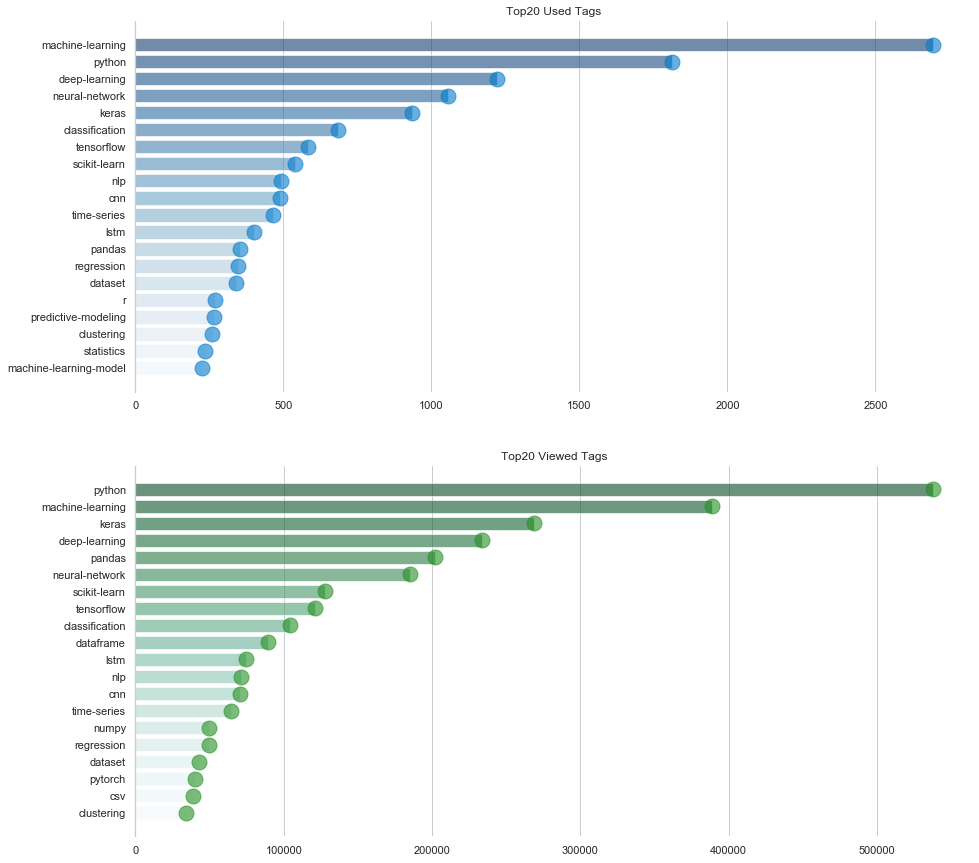

In [16]:
# Make bar plots for top20_used_tags and top20_viewed_tags
# Set seaborn style
sns.set(style = 'whitegrid')
# Setup plot canvas 
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 15))

# Bar plots for top20_used_tags
top_used_tags = sns.barplot(y = top20_used_tags.index, x = top20_used_tags, palette="Blues_r", ax = ax1, alpha = 0.6)
ax1.set_title('Top20 Used Tags')
# Bar plots for top20_viewed_tags
top_viewed_tags = top_used_tags = sns.barplot(y = top20_viewed_tags.index, x = top20_viewed_tags, palette= 'BuGn_r', ax = ax2, alpha = 0.6)
ax2.set_title('Top20 Viewed Tags')

# Beautify plot
sns.despine(fig = f, top = True, bottom = True)
ax1_range = range(0, len(top20_used_tags))
ax1.plot(top20_used_tags, ax1_range, "o", markersize=15, color='#007ACC', alpha=0.6)
ax2_range = range(0, len(top20_viewed_tags))
ax2.plot(top20_viewed_tags, ax2_range, "o", markersize=15, color='#239023', alpha=0.6)

# light_palette = sns.light_palette((210, 90, 60), input="husl")
# for item in top_used_tags.get_xticklabels():
#     item.set_rotation(90)

In [17]:
# Explore correlations between tags 
top_tags = pd.concat([top20_used_tags,top20_viewed_tags], axis = 1, join = 'outer', ignore_index = True)
top_tags.reset_index(inplace=True)
top_tags.rename(columns={'index':'tags', 0:'used_ct', 1:'viewed_ct'}, inplace=True)
top_tags.corr()

,used_ct,viewed_ct
used_ct,1.000000,0.851466
viewed_ct,0.851466,1.000000


In [18]:
# Find out relationship between pair of tags by counting how many times a pair of tags are used together.
# Set up dataframe with tags as index & columns 
pair_tag = pd.DataFrame(columns = unique_tags, index = unique_tags)
pair_tag.iloc[:5,:5]

,machine-learning,data-mining,regression,linear-regression,regularization
machine-learning,NaN,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN,NaN
regularization,NaN,NaN,NaN,NaN,NaN


In [19]:
# Incrementor for tags in a row was used in posts['Tags']
pair_tag.fillna(0, inplace = True)

# `t` is a list of tags 
for t in posts['Tags']:
        pair_tag.loc[t,t] += 1
pair_tag

,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,...,haar-cascade,gru,pattern-recognition,text-classification,parquet,encoder,label-smoothing,label-flipping,3d-object-detection,kitti-dataset
machine-learning,2693,95,119,68,20,499,131,9,29,188,...,0,0,1,0,0,0,0,0,0,0
data-mining,95,217,3,1,0,27,11,0,0,2,...,0,0,0,0,0,0,0,0,0,0
regression,119,3,347,35,2,59,24,1,6,37,...,0,0,0,0,0,0,0,0,0,0
linear-regression,68,1,35,175,1,30,10,1,2,27,...,0,0,0,0,0,0,0,0,0,0
regularization,20,0,2,1,50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
encoder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
label-smoothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
label-flipping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3d-object-detection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [20]:
# Top20_used_tags relation 
top_used_relation = pair_tag.loc[top20_used_tags.index, top20_used_tags.index]
top_used_relation

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


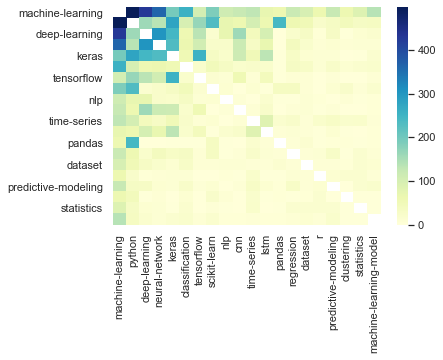

In [62]:
# Take out self-correlations to have a clearer view 
for i in range(top_used_relation.shape[0]):
    top_used_relation.iloc[i,i]= None

# Create a heatmap for paired-tags correlations 
sns.heatmap(top_used_relation, cmap = 'YlGnBu')

## "Is deep learning just a fad?"

In [22]:
# Read in a new dataset with all of the questions ever asked on DSSE, their dates and tags.
all_questions = pd.read_csv('all_questions.csv')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [23]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [24]:
# Transform `Tags` column as in the previews dataset
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$','').str.split('><')

* In exploring the most used tags from the dataset before, we can find tags that are related to deep learning. We will deem questions with these tags 'deep learning related'. 

In [25]:
# Deep learning realated tags
dl_tags = ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']

# Create a new column for counting how many deep learning related tags are in the question  
all_questions['dl_tag_ct'] = 0

for i in range(all_questions.shape[0]):
        for t in all_questions.loc[i, 'Tags']:
            if t in dl_tags:
                all_questions.loc[i,'dl_tag_ct']+=1

In [26]:
# Convert CreationDate to datetime and keep only the year-month part since we are looking for trend in a monthly fashion 
all_questions['CreationYM'] = pd.to_datetime(all_questions['CreationDate']).dt.to_period('M')
all_questions['CreationYM'].head()

0    2019-02
1    2019-02
2    2019-02
3    2019-02
4    2019-02
Name: CreationYM, dtype: period[M]

In [27]:
# Find rows that has more than zero dl_tag_ct and group by month to count how many deep learning related questions are asked per month
monthly_num = all_questions[all_questions['dl_tag_ct']!=0].groupby('CreationYM').size()

# Create a new df
monthly_num = pd.DataFrame(monthly_num, columns= ['dl_question_ct'])

In [32]:
# Find total number of questions asked by month
monthly_num['total_question_ct'] = all_questions.groupby('CreationYM').size()
# Percetage of deep learning questions asked by month 
monthly_num['pct%'] = round(monthly_num['dl_question_ct']/monthly_num['total_question_ct']*100,2)
monthly_num.index = monthly_num.index.astype(str)

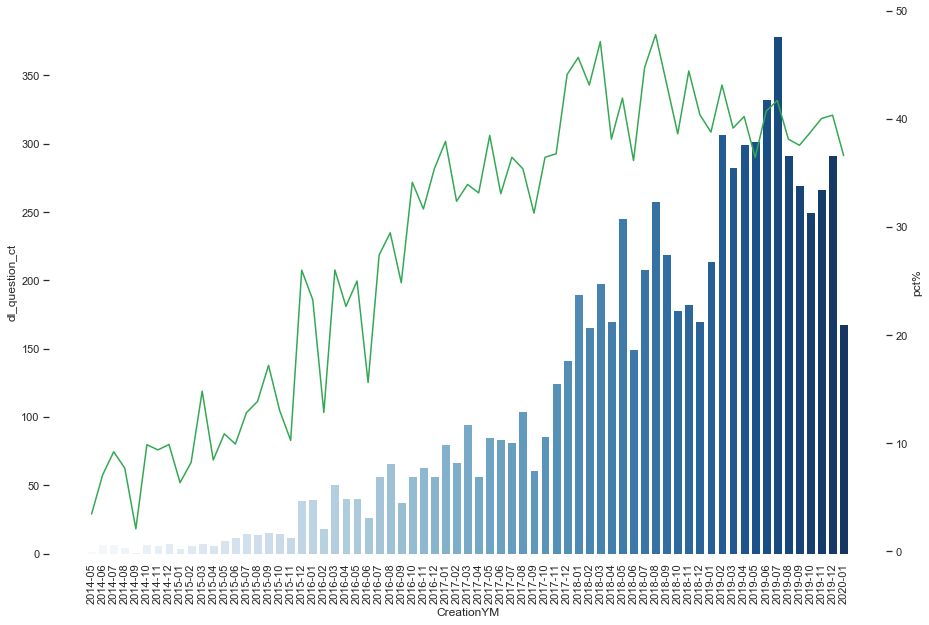

In [57]:
# Visulize above findings 
sns.set(style = 'white')
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.barplot(x = monthly_num.index, y = monthly_num['dl_question_ct'], ax = ax, palette="Blues")

sns.lineplot(x = monthly_num.index, y = monthly_num['pct%'], ax = ax2, c = '#32a852')
sns.despine(fig, left = True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# Conclusion
* From analyzing question tags, we can conclude that 'deep-learning' is the popular topic.
* By looking into the trends of 'deep-learning' related questions, we can conclude that the popularity of the topic has been dramatically growing between 2014 and 2017. The heat has cooled down a little since 2018, but it has been maintaining its popularity. 